In [1]:
import keras
# Cargue el conjunto de datos Fashion MNIST
fmnist = keras.datasets.fashion_mnist

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Cargue la division de entrenamiento y prueba del conjunto de datos Fashion MNIST

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

Label: 9
Image: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   2   0   1   0  16  94   0   0   2   1   1   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   1   1   0   0   1   0 101 196 187   8   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   1   1   0   1   0   0 161 167 166 112  11   1   0   0   6   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   3   0 121 213 187 183 180 179 155 147 129 175   8]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   1   2 

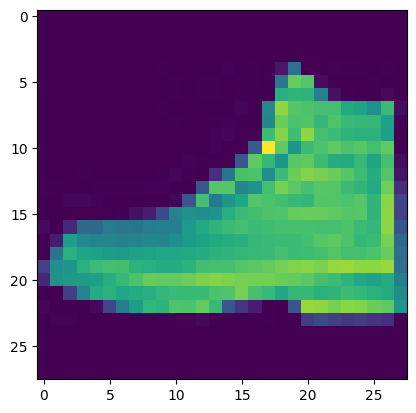

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Puedes poner aqui entre 0 y 59999
index = 50000
# Imprime la etiqueta y la image
np.set_printoptions(linewidth=200)
print(f'Label: {training_labels[index]}')
print(f'Image: \n {training_images[index]}')

# Visualiza la imagen
plt.imshow(training_images[index])

In [9]:
# Normalizar los valores de pixeles del tren y probar las imagenes
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [10]:
# Construir el modelo de clasificación
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
# Compilaer el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5010 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3747 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3385 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3146 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2981 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2807 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2711 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2599 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2495 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - 

<Axes: >

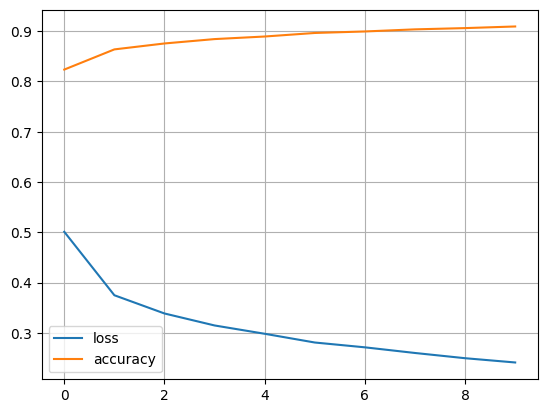

In [14]:
import pandas as pd
# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

In [15]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print('Perdida en el conjunto de entrenamiento', loss)
print('Precisión en el conjunto de entrenamiento', accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print('Perdida en el conjunto de prueba', loss)
print('Precisión en el conjunto de prueba', accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2195 - accuracy: 0.9175
Perdida en el conjunto de entrenamiento 0.21949131786823273
Precisión en el conjunto de entrenamiento 0.9175166487693787
313/313 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8885
Perdida en el conjunto de prueba 0.333542138338089
Precisión en el conjunto de prueba 0.8884999752044678


In [34]:
# predict
predict_index = 250
print(f'Label: {test_labels[predict_index]}')

predict_classification = model.predict(test_images[predict_index:predict_index+1])
print(f'Classification:\n {predict_classification.reshape(-1, 1)}')
print('\nTotal',predict_classification.sum())

Label: 9
1/1 [==============================] - 0s 25ms/step
Classification:
 [[2.2458342e-09]
 [7.6627538e-10]
 [2.1146051e-12]
 [3.1931277e-11]
 [2.9365896e-08]
 [4.7294958e-05]
 [1.9157514e-11]
 [1.1949717e-01]
 [3.8448375e-10]
 [8.8045543e-01]]

Total 0.99999994
